In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dadwa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [18]:
data = pd.read_csv('Movie_Review.csv')

In [19]:
data.dropna(inplace=True)

In [20]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [26]:
data['text'] = data['text'].apply(clean_review)

In [28]:
!pip install wordcloud


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/301.2 kB 653.6 kB/s eta 0:00:01
   -------------------- ------------------- 153.6/301.2 kB 1.0 MB/s eta 0:00:01
   ----------------------- ---------------- 174.1/301.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.2 MB/s eta 0:00:00


In [30]:
#wordcloud 

from wordcloud import WordCloud

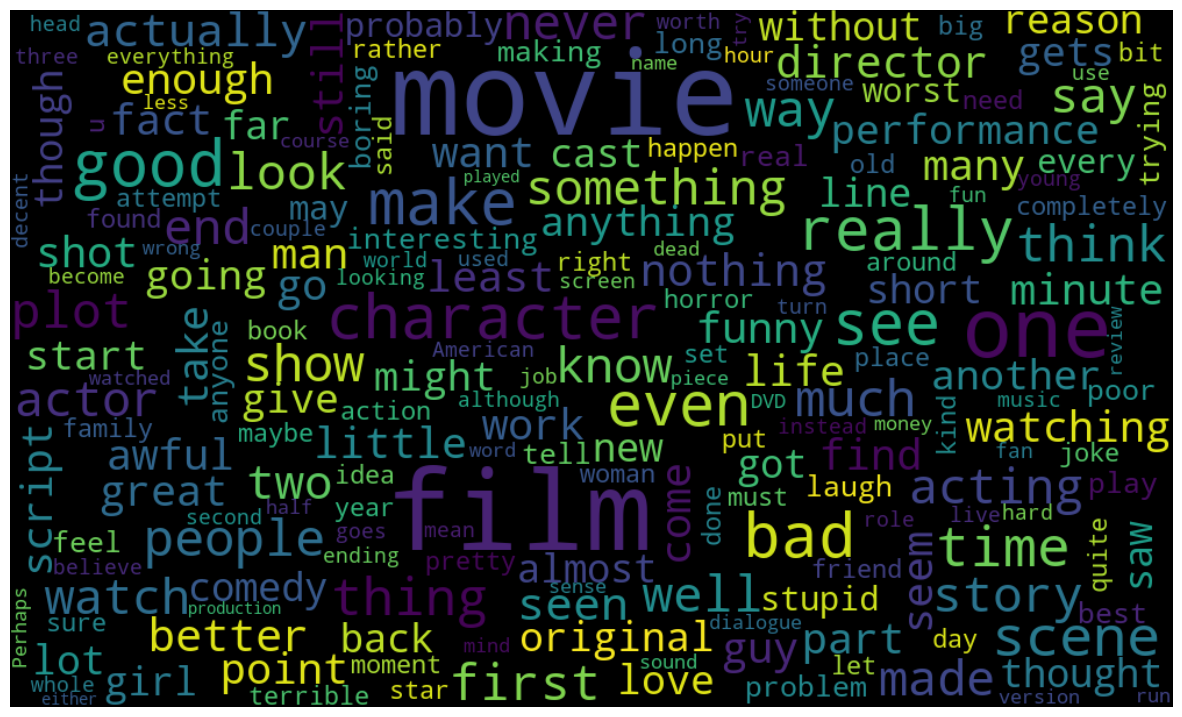

In [32]:
#draw Wordcloud
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

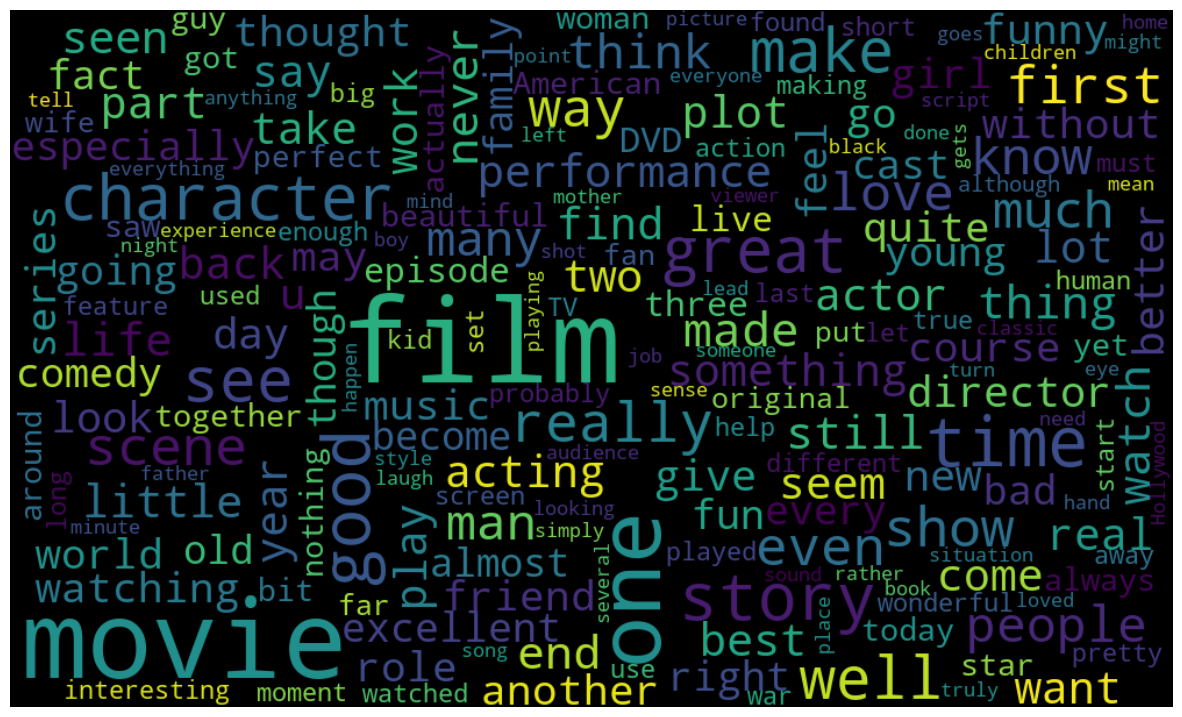

In [34]:
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [38]:
reviews = cv.fit_transform(data['text']).toarray()

In [40]:
data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

C:\Users\dadwa\AppData\Local\Temp\ipykernel_6772\3769914066.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])


In [42]:
data['sentiment'].value_counts()

sentiment
0    500
1    500
Name: count, dtype: int64

In [44]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [52]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [54]:
predict = model.predict(reviews_test)

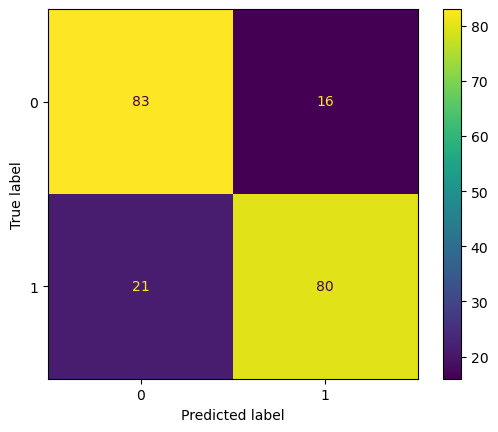

In [56]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [58]:
import pickle as pk

In [60]:
pk.dump(model,open('model.pkl','wb'))

In [62]:
pk.dump(cv,open('scaler.pkl','wb'))